<h1>Drug Classification</h1>

<h3> Importing the necessary libraries </h3>

In [101]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('drug200.xls')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [103]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Great, this dataset consists of ages 15-74

In [104]:
df.shape

(200, 6)

6 features, 200 rows

In [105]:
{col: df[col].unique() for col in ['BP', 'Cholesterol', 'Drug']}

{'BP': array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 'Cholesterol': array(['HIGH', 'NORMAL'], dtype=object),
 'Drug': array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)}

5 different types of drugs in our target variable.

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


lets convert the object data types to categorical data types

In [107]:
cat_cols = ['Sex', 'BP', 'Cholesterol', 'Drug']
df[cat_cols] = df[cat_cols].astype("category")

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    category
 2   BP           200 non-null    category
 3   Cholesterol  200 non-null    category
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 4.6 KB


In [109]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

No need to fill our null values as none of them have any null values here

<h3> Exploratory Data Analysis </h3>

In [110]:
class dataVisualisation:

    def __init__(self, df, style='darkgrid'):
        self.df = df
        self.style = style
        sns.set_style(style)

    def plot_boxplot(self, x_column = None, y_column = None, hue = None, col = None, palette='husl'):
        """
        Input: Takes in x_column, y_column, hue and col.
        Output: Outputs a boxplot.
        """
        graph = sns.catplot(x = x_column, y = y_column, data = self.df,
                            hue = hue, col = col, kind = "box", 
                            legend = False, palette= palette)

        plt.xlabel(x_column)
        plt.ylabel("FRQ")
        plt.show()

    def plot_displot(self, x_column = None, bins = None, kde = None, hue = None, col = None, multiple = 'stack', palette='husl'):
        """Input: Takes in x_column, bins size, kde, hue and col.
        Output: Outputs a displot.
        """
        graph = sns.displot(x = x_column, bins = bins, data = self.df,
                            hue = hue, col = col, kde = kde
                            , multiple = multiple, palette=palette)
        plt.xlabel(x_column)
        plt.ylabel("Count")
        plt.show()

    def plot_countplot(self, column = None, hue = None, rotation = None):
        """
        Input: Takes in column and hue.
        Output: Displays a countplot.
        """
        graph = sns.countplot(x = column, data = self.df, hue = column,
                              order = df[column].value_counts().index,
                              legend=False)
        
        for container in graph.containers:
            graph.bar_label(container)
        plt.xticks(rotation=45)
        plt.show()

    def plot_lineplot(self, x_column = None, y_column = None, hue = None, markers = True, rotation=0):
        """
        Input: Takes in x_column, y_column, hue, markers and rotation.
        Output: Displays a lineplot.
        """
        graph = sns.lineplot(x=x_column, y=y_column, data = self.df, hue = hue,
                             marker = 'o' if markers else None, linewidth=2)
        
        plt.xticks(rotation=rotation)
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f"{y_column} vs. {x_column}")
        if hue:
            plt.legend(title='Hue' if hue else None)
        plt.tight_layout()
        plt.show()

    def plot_pie_chart(self, column_name, autopct = '%1.2f%%', startangle = 90, shadow=True):
        """
        Input: Takes in column name (categorical).
        Output: Displays a pie-chart.
        """
        counts = self.df[column_name].value_counts()
        graph = plt.pie(counts, labels=counts.index, startangle=startangle,
                        autopct=autopct, shadow=shadow, counterclock=False)
        
        plt.axis("equal")
        plt.title(f"Distribution of {column_name}")
        plt.tight_layout
        plt.show()

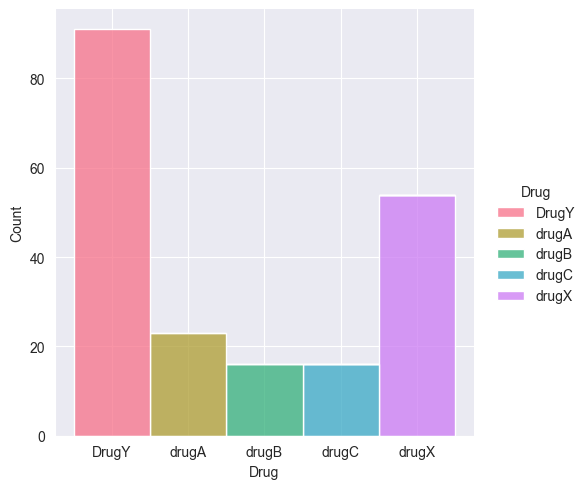

In [111]:
data_viz = dataVisualisation(df)
data_viz.plot_displot(x_column='Drug', bins=20, hue='Drug')

As can be observed here, we have over 80 samples of just DrugY which is much more than any drug in our sample. This can cause issues for our models later.

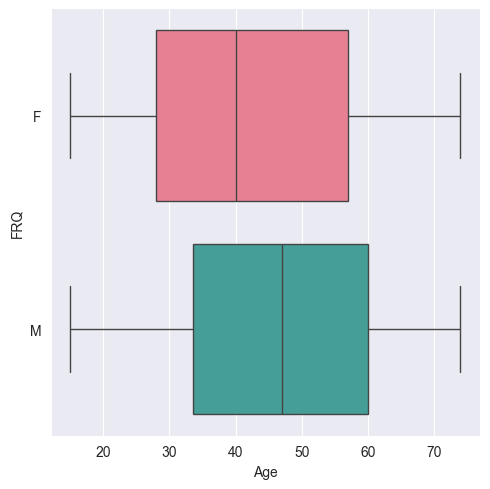

In [112]:
data_viz.plot_boxplot(x_column = 'Age', y_column= 'Sex', hue='Sex')

Most of the sample is largely just 30-60 age group (approx) for both genders.

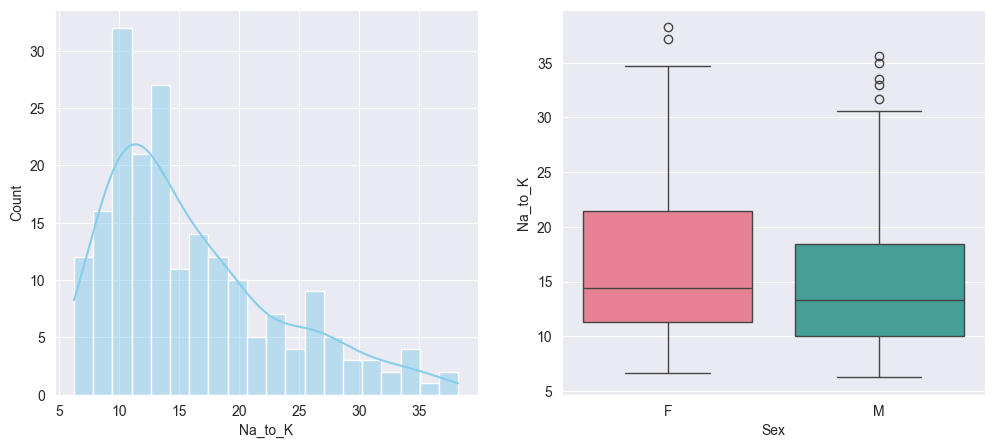

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=data_viz.df, x='Na_to_K', bins=20, kde=True, ax=axes[0], color='skyblue')
sns.boxplot(data=data_viz.df, x='Sex',y = 'Na_to_K', hue='Sex', ax=axes[1], palette='husl')
plt.show()

A right skewed distribution, it tells us that the potassium to sodium ratio is highest aroung 10-15 and then it keep decreases. <br>
<br>
Also, the ratio is slightly higher in female population in our sample than male population

> ---

<h3> Implementation of Classification ML models on our dataset </h3>

First we make our dataset fit for model implementations.

In [114]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


First, we will split our dataset into X and y variables

In [115]:
#Feature variable
X = df.drop('Drug', axis=1)

#Target variable
y = df['Drug']

In [116]:
X.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114


In [117]:
y.head(3)

0    DrugY
1    drugC
2    drugC
Name: Drug, dtype: category
Categories (5, object): ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']

In [118]:
num_cols = ['Age', 'Na_to_K']

In [119]:
cat_cols = cat_cols[:3]
cat_cols

['Sex', 'BP', 'Cholesterol']

Now, we will encode our columns.

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

le = LabelEncoder()
encoded_y_train = le.fit_transform(y_train)
encoded_y_test = le.fit_transform(y_test)

preprocessor=ColumnTransformer(transformers=[('num', StandardScaler(), num_cols),
                                             ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)],
                                             remainder='passthrough')

encoded_X_train = preprocessor.fit_transform(X_train)
encoded_X_test = preprocessor.fit_transform(X_test)

Now, our data is clean and ready for model implementations.

In [143]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

<h3> Linear Discriminant Analysis <h3>

In [128]:
lda = LinearDiscriminantAnalysis()
lda.fit(encoded_X_train, encoded_y_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [129]:
y_pred_lda = lda.predict(encoded_X_test)
print(f"Accuracy: {lda.score(encoded_X_test, encoded_y_test)}")

Accuracy: 0.85


Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        18
           1       1.00      1.00      1.00         5
           2       0.75      1.00      0.86         3
           3       0.60      1.00      0.75         3
           4       0.79      1.00      0.88        11

    accuracy                           0.85        40
   macro avg       0.83      0.93      0.86        40
weighted avg       0.89      0.85      0.85        40



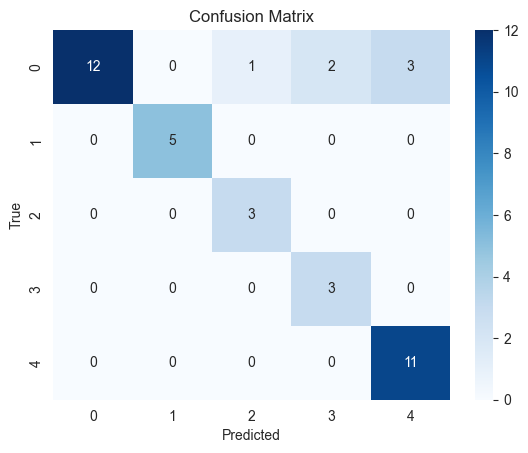

In [133]:
print("Accuracy:", accuracy_score(encoded_y_test, y_pred_lda))
print("\nClassification Report:\n", classification_report(encoded_y_test, y_pred_lda))
cm = confusion_matrix(encoded_y_test, y_pred_lda)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

LDA does quite well here with an accuracy score of 0.85

<h3> Higher order LDA </h3>

In [137]:
for i in range(1, 4):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_poly = poly.fit_transform(encoded_X_train)
    X_test_poly = poly.transform(encoded_X_test)

    lda_poly = LinearDiscriminantAnalysis()
    lda_poly.fit(X_train_poly, encoded_y_train)
    y_pred_poly = lda_poly.predict(X_test_poly)

    print(f"Accuracy (degree = {i}): {accuracy_score(encoded_y_test, y_pred_poly)}")

Accuracy (degree = 1): 0.85
Accuracy (degree = 2): 0.95
Accuracy (degree = 3): 0.925


Here, we get the highest accuracy at 2nd degree.

<h3> Quadratic Discriminant Analysis <h3>

In [141]:
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda.fit(encoded_X_train, encoded_y_train)

,priors,None
,reg_param,0.1
,store_covariance,False
,tol,0.0001


In [142]:
y_pred_qda = qda.predict(encoded_X_test)
print(f"Accuracy: {qda.score(encoded_X_test, encoded_y_test)}")

Accuracy: 0.925


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.79      1.00      0.88        11

    accuracy                           0.93        40
   macro avg       0.96      0.97      0.96        40
weighted avg       0.94      0.93      0.93        40



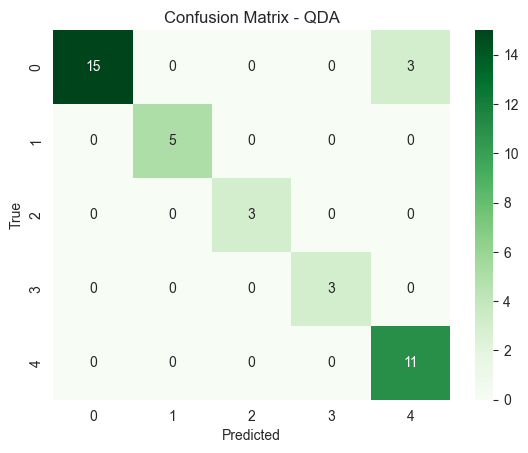

In [148]:
print("Classification Report:\n")
print(classification_report(encoded_y_test, y_pred_qda))

# Confusion matrix
cm = confusion_matrix(encoded_y_test, y_pred_qda)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - QDA')
plt.show()

It performs a little worse than LDA.

<h3> Logistic Regression <h3>

In [144]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(encoded_X_train, encoded_y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
y_pred_log_reg = log_reg.predict(encoded_X_test)
print(f"Accuracy: {log_reg.score(encoded_X_test, encoded_y_test)}")

Accuracy: 0.95


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       0.92      1.00      0.96        11

    accuracy                           0.95        40
   macro avg       0.97      0.92      0.94        40
weighted avg       0.95      0.95      0.95        40



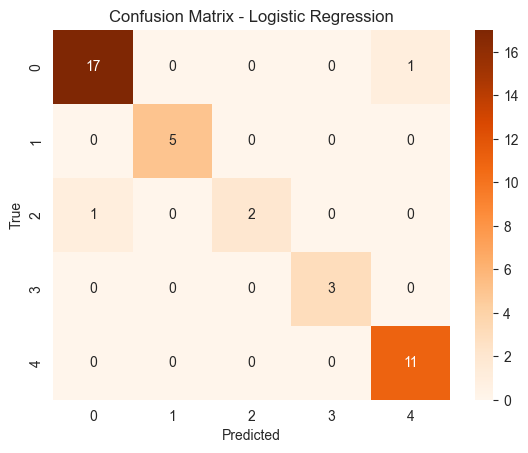

In [149]:
print("Classification Report:\n")
print(classification_report(encoded_y_test, y_pred_log_reg))

# Confusion matrix
cm = confusion_matrix(encoded_y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Here, logistic regression had the same accuracy as LDA of order 2.

<h3> Naive Bayes <h3>

<h3> K-Nearest Neighbors <h3>

<h3> Support vector Machine <h3>

> ---

<h2> Bootstrap </h2>